In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
from time import time
import tensorflow
from tensorflow.keras import models
from tensorflow.keras.layers import *

In [69]:
fred_md = pd.read_csv("data/Fred_MD_Current.csv")
fred_md.drop(0,axis=0, inplace=True) #Dropping the first row because it contains the transfotmation values. For this data look at fred_md_metadata.tcode.
fred_md.set_index("sasdate", inplace=True)
fred_md_metadata = pd.read_csv("data/FRED-MD_Metadata.csv", encoding='iso-8859-1')
fred_md.index = pd.to_datetime(fred_md.index)
fred_md.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9665,23.3891,22.2688,31.7011,19.0149,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1959-02-01,2593.596,2434.8,15.346,278713.9773,18369.56308,22.3966,23.7048,22.4617,31.9337,19.1147,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
1959-03-01,2610.396,2452.7,15.491,277775.2539,18523.05762,22.7193,23.8483,22.5719,31.9337,19.4890,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
1959-04-01,2627.446,2470.0,15.435,283362.7075,18534.46600,23.2032,24.1927,22.9026,32.4374,19.6138,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
1959-05-01,2642.720,2486.4,15.622,285307.2201,18679.66354,23.5528,24.3936,23.1231,32.5925,20.0130,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN


In [70]:
fred_md_metadata.head()

,id,tcode,fred,description,gsi,gsi:description,group
0,1,5,RPI,Real Personal Income,M_14386177,PI,1
1,2,5,W875RX1,Real personal income ex transfer receipts,M_145256755,PI less transfers,1
2,3,5,DPCERA3M086SBEA,Real personal consumption expenditures,M_123008274,Real Consumption,4
3,4,5,CMRMTSPLx,Real Manu. and Trade Industries Sales,M_110156998,M&T sales,4
4,5,5,RETAILx,Retail and Food Services Sales,M_130439509,Retail sales,4


In [71]:
fred_md_metadata.loc[fred_md_metadata["fred"] == "EXSZUSx"]

,id,tcode,fred,description,gsi,gsi:description,group
95,102,5,EXSZUSx,Switzerland / U.S. Foreign Exchange Rate,M_110154768,Ex rate: Switz,6


### Unemployment Rate and the Strength of the U.S. Dollar Worldwide

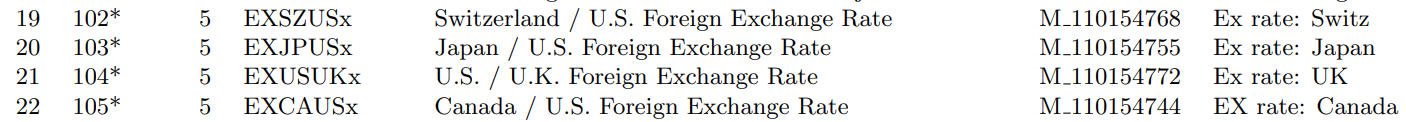
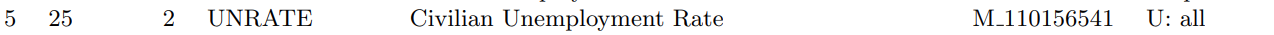

In [72]:
# Pulling the columns to be used
urate_dollar_df = fred_md[["EXSZUSx", "EXJPUSx", "EXUSUKx", "EXCAUSx", "UNRATE"]]
frequency = pd.infer_freq(fred_md.index)
urate_dollar_df.index = pd.DatetimeIndex(fred_md.index, freq=frequency)
urate_dollar_df.head()

,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,UNRATE
sasdate,,,,,
1959-01-01,4.3122,359.8417,2.8065,0.9671,6.0
1959-02-01,4.3133,359.8417,2.8093,0.9748,5.9
1959-03-01,4.3228,359.8417,2.8127,0.9698,5.6
1959-04-01,4.3226,359.8417,2.8165,0.9636,5.2
1959-05-01,4.3228,359.8417,2.8145,0.9630,5.1


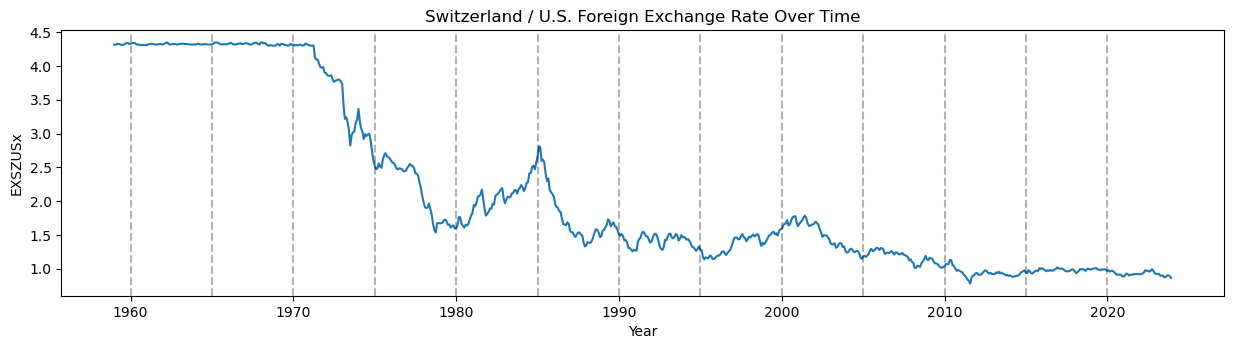

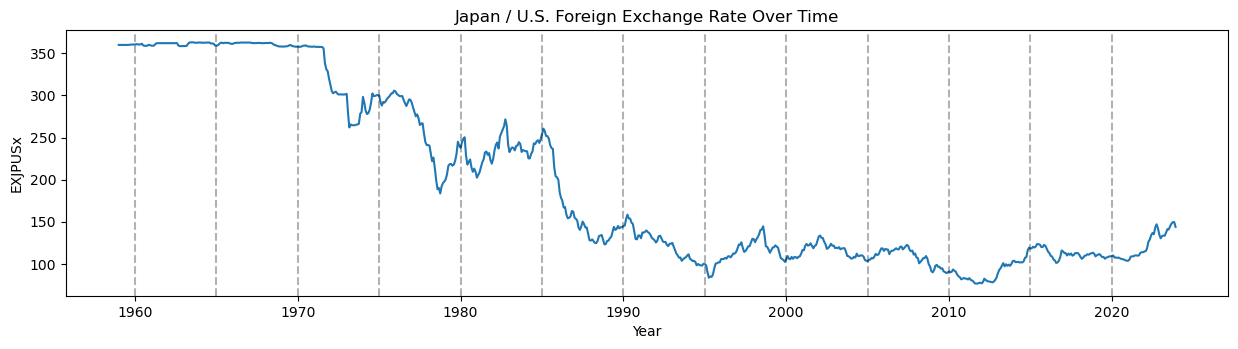

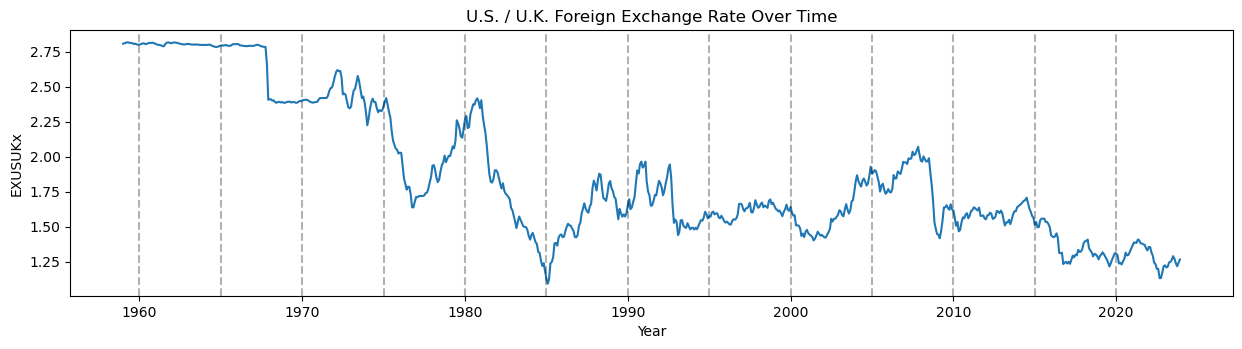

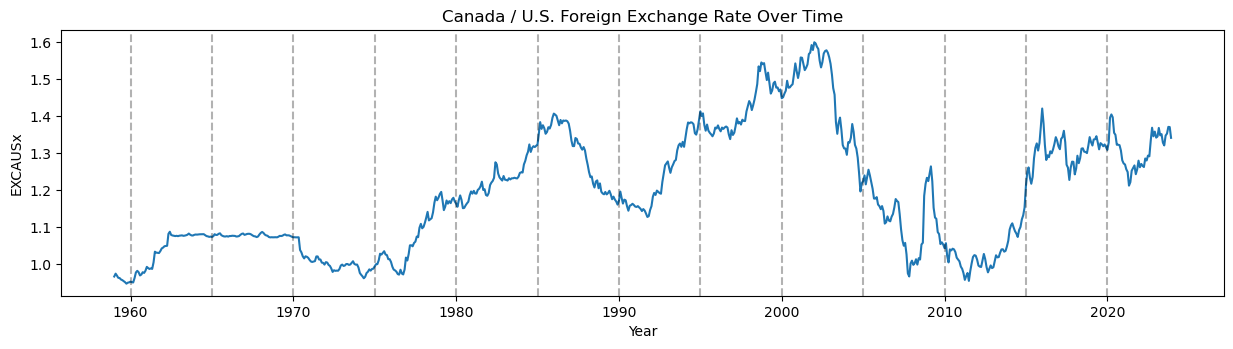

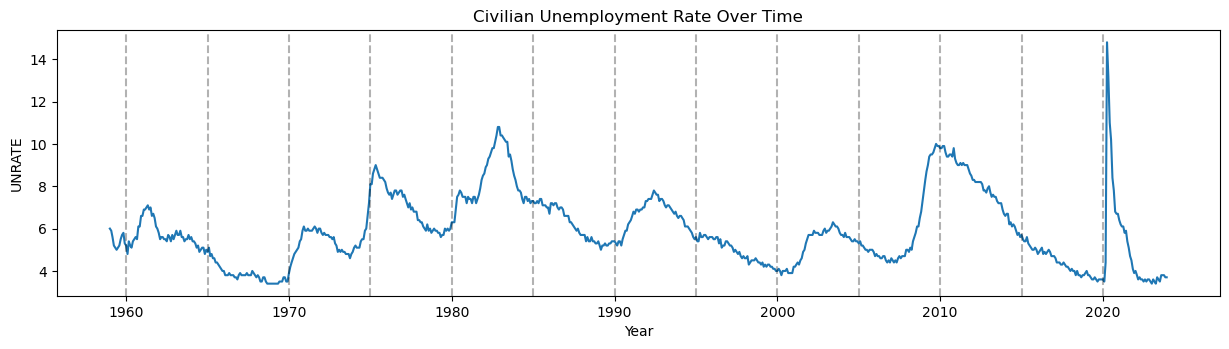

In [73]:
count = 1
for column in urate_dollar_df.columns:
    title_ = fred_md_metadata.loc[fred_md_metadata["fred"] == column, "description"].values[0]
    plt.figure(figsize=(15,20))
    plt.subplot(len(urate_dollar_df.columns), 1, count)
    plt.plot(urate_dollar_df[column])
    plt.title(f"{title_} Over Time")
    plt.xlabel("Year")
    plt.ylabel(f"{column}")
    for year in range (urate_dollar_df.index[0].year+1,urate_dollar_df.index[-1].year +1, 5):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)
    count += 1

__Takeaways From The Plots:__

1. There don't seem to be any seasonal patterns in any of these measures.
2. In terms of the relationship between the U.S. dollar and Japanese, English, and Swiss currencies, the U.S. dollar seemed to have been considerably stronger until the 1970s. Since then, the relationships have fluctuated -- perhaps because the U.S. began importing more goods. However, it should still be noted that the U.S. dollar has been consistently stronger than these other currencies.
3. There is a major spike in unemployment in 2020 due to COVID-19; it will be interesting to see how the various Neural Networks react to this spike.

### CNN

In [114]:
# Pre-processing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_np = scaler.fit_transform(urate_dollar_df.to_numpy())
scaled_df = pd.DataFrame(scaled_np, columns = ["EXSZUSx", "EXJPUSx", "EXUSUKx", "EXCAUSx", "UNRATE"])
scaled_df.index = urate_dollar_df.index
scaled_df.head()

,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,UNRATE
sasdate,,,,,
1959-01-01,1.778506,1.626809,1.877341,-1.414157,0.054052
1959-02-01,1.779390,1.626809,1.882991,-1.366510,-0.005413
1959-03-01,1.787025,1.626809,1.889852,-1.397450,-0.183806
1959-04-01,1.786864,1.626809,1.897519,-1.435815,-0.421664
1959-05-01,1.787025,1.626809,1.893484,-1.439528,-0.481129


In [115]:
# Function from https://colab.research.google.com/drive/1b3CUJuDOmPmNdZFH3LQDmt5F0K3FZhqD?usp=sharing#scrollTo=7EViSFyntz9j
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [116]:
cnn_x_sz, cnn_y_sz = df_to_X_y(scaled_df[["EXSZUSx", "UNRATE"]], 3)
cnn_x_jp, cnn_y_jp = df_to_X_y(scaled_df[["EXJPUSx", "UNRATE"]], 3)
cnn_x_uk, cnn_y_uk = df_to_X_y(scaled_df[["EXUSUKx", "UNRATE"]], 3)
cnn_x_ca, cnn_y_ca = df_to_X_y(scaled_df[["EXCAUSx", "UNRATE"]], 3)
cnn_y_ca.shape

(777,)

In [117]:
TRAIN = 499
VAL = 650

x_sz_train, x_sz_val, x_sz_test = cnn_x_sz[:TRAIN], cnn_x_sz[TRAIN:VAL], cnn_x_sz[VAL:]
x_jp_train, x_jp_val, x_jp_test = cnn_x_jp[:TRAIN], cnn_x_jp[TRAIN:VAL], cnn_x_jp[VAL:]
x_uk_train, x_uk_val, x_uk_test = cnn_x_uk[:TRAIN], cnn_x_uk[TRAIN:VAL], cnn_x_uk[VAL:]
x_ca_train, x_ca_val, x_ca_test = cnn_x_ca[:TRAIN], cnn_x_ca[TRAIN:VAL], cnn_x_ca[VAL:]

y_sz_train, y_sz_val, y_sz_test = cnn_y_sz[:TRAIN], cnn_y_sz[TRAIN:VAL], cnn_y_sz[VAL:]
y_jp_train, y_jp_val, y_jp_test = cnn_y_jp[:TRAIN], cnn_y_jp[TRAIN:VAL], cnn_y_jp[VAL:]
y_uk_train, y_uk_val, y_uk_test = cnn_y_uk[:TRAIN], cnn_y_uk[TRAIN:VAL], cnn_y_uk[VAL:]
y_ca_train, y_ca_val, y_ca_test = cnn_y_ca[:TRAIN], cnn_y_ca[TRAIN:VAL], cnn_y_ca[VAL:]

In [118]:
def create_cnn():
    CNN = models.Sequential()
    CNN.add(InputLayer((3, 2)))
    CNN.add(Conv1D(64, kernel_size = 2, activation = "tanh"))
    CNN.add(Flatten())
    CNN.add(Dense(1, "linear"))
    CNN.compile(optimizer='adam', loss='mse')
    return CNN

cnn_sz = create_cnn()
cnn_jp = create_cnn()
cnn_uk = create_cnn()
cnn_ca = create_cnn()


In [119]:
cnn_sz.fit(x_sz_train, y_sz_train, validation_data = (x_sz_val, y_sz_val),epochs=15)
print("SZ done")
cnn_jp.fit(x_jp_train, y_jp_train, validation_data = (x_jp_val, y_jp_val),epochs=15)
print("JP done")
cnn_uk.fit(x_uk_train, y_uk_train, validation_data = (x_uk_val, y_uk_val),epochs=15)
print("UK done")
cnn_ca.fit(x_ca_train, y_ca_train, validation_data = (x_ca_val, y_ca_val),epochs=15)
print("CA done")

Epoch 1/15
16/16 [==============================] - 1s 9ms/step - loss: 0.1736 - val_loss: 0.0377
Epoch 2/15
16/16 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.0048
Epoch 3/15
16/16 [==============================] - 0s 3ms/step - loss: 0.0095 - val_loss: 0.0021
Epoch 4/15
16/16 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.0017
Epoch 5/15
16/16 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.0016
Epoch 6/15
16/16 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0015
Epoch 7/15
16/16 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0017
Epoch 8/15
16/16 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0015
Epoch 9/15
16/16 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0016
Epoch 10/15
16/16 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0014
Epoch 11/15
16/16 [

In [120]:
sz_preds = cnn_sz.predict(x_sz_test)
jp_preds = cnn_jp.predict(x_jp_test)
uk_preds = cnn_uk.predict(x_uk_test)
ca_preds = cnn_ca.predict(x_ca_test)

4/4 [==============================] - 0s 0s/step


In [121]:
preds_dict = {
    "sz_preds":sz_preds.reshape(1,-1)[0],
    "jp_preds":jp_preds.reshape(1,-1)[0],
    "uk_preds":uk_preds.reshape(1,-1)[0],
    "ca_preds":ca_preds.reshape(1,-1)[0],
    "urate":scaled_np[VAL:-3,-1].reshape(1,-1)[0],
}

unscaled_preds_np = scaler.inverse_transform(pd.DataFrame(preds_dict).to_numpy())
unscaled_preds_df = pd.DataFrame(unscaled_preds_np, columns = ["EXSZUSx_preds", "EXJPUSx_preds", "EXUSUKx_preds", "EXCAUSx_preds", "UNRATE"])

In [122]:
unscaled_preds_df

,EXSZUSx_preds,EXJPUSx_preds,EXUSUKx_preds,EXCAUSx_preds,UNRATE
0,0.916228,95.073832,1.509769,1.020907,7.5
1,0.912881,96.484515,1.525610,1.024798,7.6
2,0.921008,94.729721,1.519080,1.032683,7.5
3,0.912985,95.106433,1.528418,1.041894,7.5
4,0.901381,94.898438,1.553147,1.040960,7.3
...,...,...,...,...,...
122,0.916694,143.163839,1.319368,1.334383,3.7
123,0.887264,145.302294,1.313276,1.330727,3.6
124,0.890176,148.289636,1.279842,1.343091,3.5
125,0.907609,150.228138,1.268245,1.357735,3.8


In [123]:
unscaled_preds_df.index = urate_dollar_df.index[VAL:-3]
unscaled_preds_df.head()

,EXSZUSx_preds,EXJPUSx_preds,EXUSUKx_preds,EXCAUSx_preds,UNRATE
sasdate,,,,,
2013-03-01,0.916228,95.073832,1.509769,1.020907,7.5
2013-04-01,0.912881,96.484515,1.525610,1.024798,7.6
2013-05-01,0.921008,94.729721,1.519080,1.032683,7.5
2013-06-01,0.912985,95.106433,1.528418,1.041894,7.5
2013-07-01,0.901381,94.898438,1.553147,1.040960,7.3


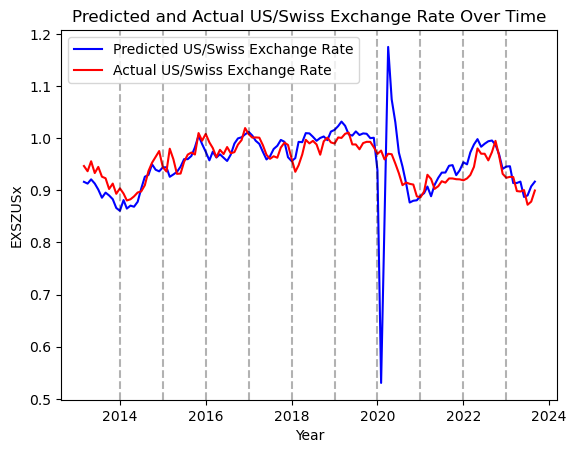

In [136]:
plt.plot(unscaled_preds_df["EXSZUSx_preds"], color = "blue", label = "Predicted US/Swiss Exchange Rate")
plt.plot(urate_dollar_df["EXSZUSx"][VAL:-3], color = "red", label = "Actual US/Swiss Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXSZUSx")
plt.title("Predicted and Actual US/Swiss Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

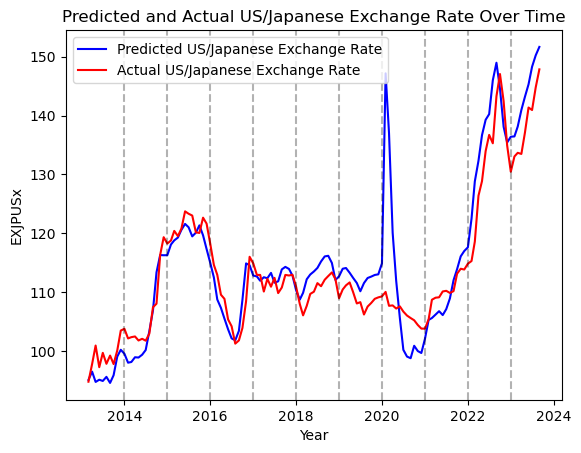

In [137]:
plt.plot(unscaled_preds_df["EXJPUSx_preds"], color = "blue", label = "Predicted US/Japanese Exchange Rate")
plt.plot(urate_dollar_df["EXJPUSx"][VAL:-3], color = "red", label = "Actual US/Japanese Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXJPUSx")
plt.title("Predicted and Actual US/Japanese Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

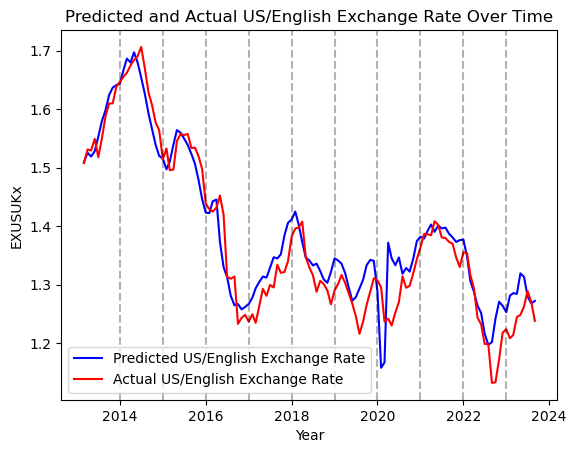

In [138]:
plt.plot(unscaled_preds_df["EXUSUKx_preds"], color = "blue", label = "Predicted US/English Exchange Rate")
plt.plot(urate_dollar_df["EXUSUKx"][VAL:-3], color = "red", label = "Actual US/English Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXUSUKx")
plt.title("Predicted and Actual US/English Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

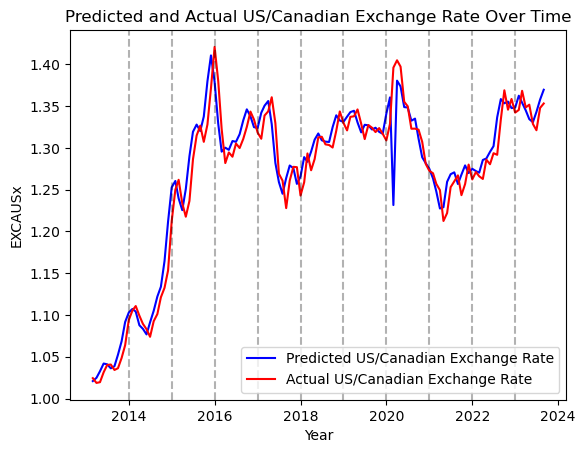

In [139]:
plt.plot(unscaled_preds_df["EXCAUSx_preds"], color = "blue", label = "Predicted US/Canadian Exchange Rate")
plt.plot(urate_dollar_df["EXCAUSx"][VAL:-3], color = "red", label = "Actual US/Canadian Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXCAUSx")
plt.title("Predicted and Actual US/Canadian Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)